In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig, Preprocessing, Trajectory, TrackConverter

In [2]:
# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))
preprocessing = Preprocessing()
track_converter = TrackConverter()

bbox = BboxSelector([
    7.554130554199218, # min_x
    51.95590322041212, # min_y
    7.590351104736328, # max_x
    51.97874790276371  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting tracks inside the bbox

# use just one track
# 'track' is appended to non-sensor related column names while pulling the data using track_api client
single_track_id = track_df['track.id'].unique()[1]
single_track = track_df[track_df['track.id'] == single_track_id]


Initializing pre-processing class
Initializing TrackConverter class


In [62]:
# represent single track as a Trajectory object
trajectory = Trajectory(single_track_id, track_df, 'track.id')
str(trajectory)

'Trajectory 5ddfd2ba44ea85025c02d828 (2019-11-28T13:41:36 to 2019-11-28T13:57:24) | Size: 186'

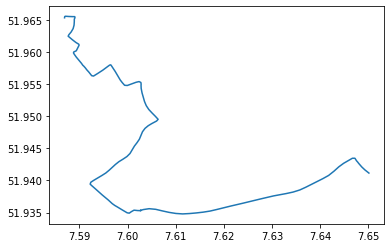

In [63]:
trajLineString = trajectory.to_linestring()

x,y = trajLineString.xy
plt.plot(x, y)

TODO: Use trajectory object for below computations

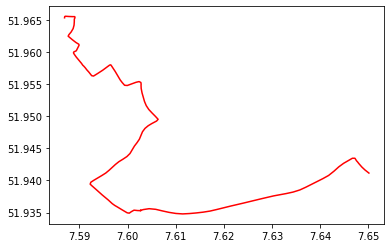

In [64]:
# Simple visualization of the raw trajectory
fig, ax = plt.subplots()
single_track_new = single_track
single_track_new['lat'] = single_track['geometry'].apply(lambda coord: coord.y)
single_track_new['lng'] = single_track['geometry'].apply(lambda coord: coord.x)
ax.plot(single_track_new['lng'], single_track_new['lat'], 'r-')
plt.show()

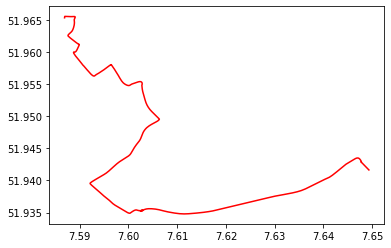

In [65]:
no_outliers = preprocessing.remove_outliers(single_track, 'CO2.value')

# interpolating for each second
interpolated_points = preprocessing.interpolate(no_outliers)

# Simple visualization of the trajectory after interpolation
fig, ax = plt.subplots()
ax.plot(interpolated_points['lng'], interpolated_points['lat'], 'r-')
plt.show()


In [66]:
import plotly.express as px

# Visualizing points by the CO2 Value
fig = px.scatter_mapbox(single_track_new, lat="lat", lon="lng", color="CO2.value", title="CO2 values along the track, before cleaning and interpolation", zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [67]:
# Visualizing points by the CO2 Value
fig = px.scatter_mapbox(interpolated_points, lat="lat", lon="lng", color="CO2.value", title="CO2 values along the track, cleaned and interpolated", zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [6]:
# TODO AGGREGATION

# convert to a moving pandas format using Sebastian's converter
# if using moving pandas format
single_track_mp = track_converter.to_movingpandas(single_track)
# call the aggregation function from the preprocessing
aggregated_track = preprocessing.aggregate(single_track_mp)
aggregated_track

# visualize the result

aggregation function called


'substitute this string with aggregation result'

In [ ]:
# TODO CLUSTERING

# convert to a moving pandas format using Sebastian's converter
# if using moving pandas format
single_track_mp = track_converter.to_movingpandas(single_track)
# call the clustering function from the preprocessing
clustered_track = preprocessing.cluster(single_track_mp)
clustered_track

# visualize the result